In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.mixture import GaussianMixture

In [78]:
dataset = pd.read_csv(r'Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [79]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

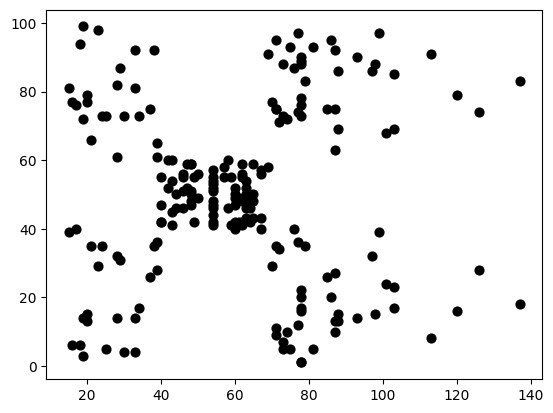

In [80]:
x_f = dataset.iloc[:, [3]]
y_f = dataset.iloc[:, [4]]
plt.scatter(x_f,y_f, s = 40, c = 'black')
plt.show()

In [81]:
X = dataset.iloc[:, [3, 4]].values

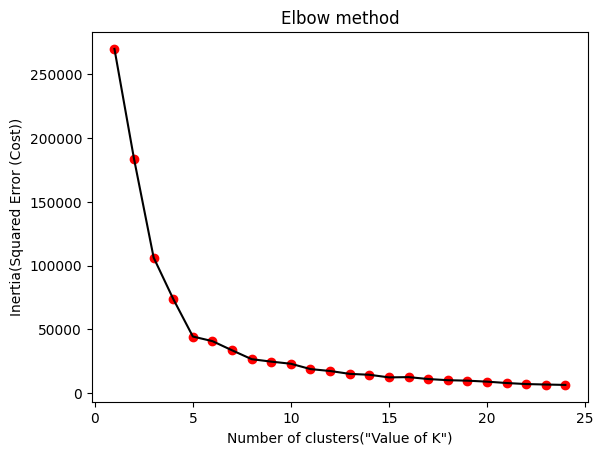

In [93]:
#We have to find the optimal K value for clustering the data.
#Now we are using the Elbow Method to find the optimal K value.
#The “init” argument is the method for initializing the centroid.
#We calculated the WCSS value for each K value. Now we have to plot the WCSS with the K value.
wcss = [] 
for i in range(1,25):  
    kmeans = KMeans(n_clusters = i, n_init='auto', init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.scatter(range(1,25), wcss,color='red')
plt.plot(range(1,25), wcss,color='black')
plt.title('Elbow method')
plt.xlabel('Number of clusters("Value of K")')
plt.ylabel('Inertia(Squared Error (Cost))')
plt.show()

In [83]:
#Training the Model
#The point at which the elbow shape is created is 5; that is, our K value or an optimal number of clusters is 5.
#Now let’s train the model on the input data with a number of clusters 5.


kmeans = KMeans(n_clusters = 5, init = "k-means++", n_init='auto',random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [84]:
X[y_kmeans == 0,0],X[y_kmeans == 0,1]

(array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
        47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
        60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
        64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64),
 array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
        52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
        42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
        47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
        46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64))

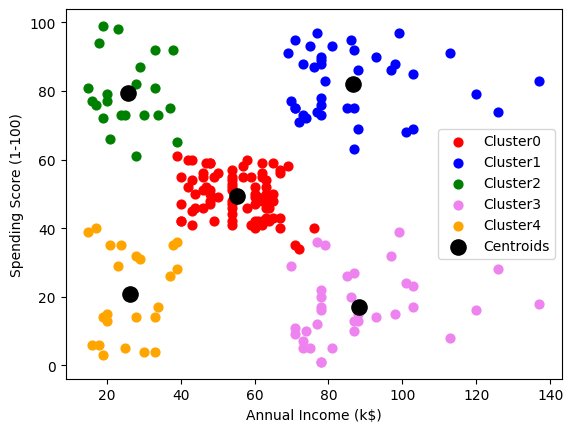

In [85]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 40, c = 'red', label = 'Cluster0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Cluster1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 40, c = 'green', label = 'Cluster2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 40, c = 'violet', label = 'Cluster3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 40, c = 'orange', label = 'Cluster4') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend()
plt.show()

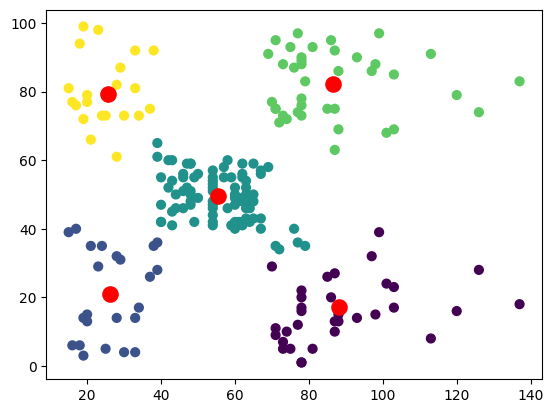

In [86]:
gmm = mixture.GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'red', label = 'Centroids')

In [87]:
df = dataset.iloc[:,[3,4]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 0, 'Number Of Component')

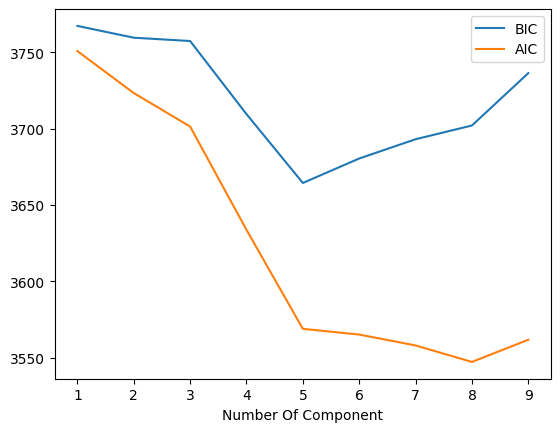

In [88]:
#Gaussian Mixture Model Section
#First We fitted 10 time in list such as we were going to
#know BIC And AIC which helps us determining the
#optimal number of clusters and We should plot our 
#BIC and AIC List of result to Know Clusters Number

#Prepare
n_conponent = np.arange(1,10)

#Create GGM Model
models = [GaussianMixture(n_components = n,
                          random_state=42).fit(df) for n in n_conponent]
#Plot
plt.plot(n_conponent,
         [m.bic(df) for m in models],
         label = 'BIC')
plt.plot(n_conponent,
         [m.aic(df) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel("Number Of Component")

In [89]:
df_test = pd.get_dummies(dataset, drop_first = True) # DROP_FIRST arg transform only 1 column 1 or 0
df_test.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [90]:
# create GM Models
model_test = GaussianMixture(n_components=5,
                        random_state=42).fit(df_test)
cluster = pd.Series(model_test.predict(df_test))
df_test['cluster'] = cluster
df_test

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
0,1,19,15,39,True,4
1,2,21,15,81,True,2
2,3,20,16,6,False,4
3,4,23,16,77,False,2
4,5,31,17,40,False,4
...,...,...,...,...,...,...
195,196,35,120,79,False,1
196,197,45,126,28,False,3
197,198,32,126,74,True,1
198,199,32,137,18,True,3


In [91]:
# finish